In [1]:
###### Config #####
import sys, os, platform
if os.path.isdir("ds-assets"):
  !cd ds-assets && git pull
else:
  !git clone https://github.com/lutzhamel/ds-assets.git
colab = True if 'google.colab' in os.sys.modules else False
system = platform.system() # "Windows", "Linux", "Darwin"
home = "ds-assets/assets/"
sys.path.append(home)  

Already up to date.


In [2]:
# notebook level imports
import pandas
import math                      # sqrt
import dsutils
import seaborn as sns; sns.set_theme()
from matplotlib.pyplot import show
from sklearn import cluster      # KMeans
from sklearn import datasets     # make_blobs

In [3]:
# we need this for our cluster plots
# this is set up for 6 clusters
palette=['yellow','blue','green','grey','brown','black']

In [4]:
# create a synthetic dataset with clusters as a dataframe
# this is used to test the clustering algorithms
# the function returns a pandas dataframe with two columns 'x' and 'y'
def gen_data(samples=300, clusters=4, density=0.60):
   data = datasets.make_blobs(n_samples=samples, 
                              n_features=2,
                              centers=clusters, 
                              cluster_std=density, 
                              random_state=0)[0] # only return the coordinates of the points
   return pandas.DataFrame(data, columns=['x','y'])

In [5]:
def plot_clusters(model, X, legend=False):
   """
   plot the clusters and their centers
   X: pandas dataframe with two columns 'x' and 'y'
   model: a fitted clustering model (e.g. KMeans)
   """
   cols = list(X.columns)
   labels = model.predict(X)
   centers = pandas.DataFrame(model.cluster_centers_, columns=cols)
   # plot clusters by color according to cluster model
   sns.scatterplot(x=X[cols[0]], 
                  y=X[cols[1]],
                  hue=labels,
                  palette=sns.color_palette("husl")[:len(centers)],  
                  legend=legend)
   # plot centers
   sns.scatterplot(x=centers[cols[0]], 
                  y=centers[cols[1]], 
                  color='red')

# Unsupervised Learning: Clustering

* Unsupervised machine learning means that there is **no target attribute** in the training data
* We call data without target attribute **unlabeled data**
* Clustering is an unsupervised machine learning task
* In clustering we **build models** that describe the structure in **unlabeled data** as clusters



## Variance

* A key concept in clustering is the notion of variance.
* We have the following definition for **variance** in a cluster,

> The variance of a cluster is defined as the average of squared distances of the points in the cluster from the cluster center.

We define a cluster $K$ as a set of points,
$$
K = \{x_1, x_2,\dots,x_n\}
$$
with $\bar{\mu}$ the mean of those point and also the cluster center, then variance of cluster $K$ is,
$$
{\rm Var}(K) = \frac{1}{n} \sum_{i=1}^n {\rm dist}(\bar{\mu}, x_i)^2
$$


**Observation**: For points tightly clustered around the cluster center the variance will be small and for points loosely clustered around the cluster center the variance will be large.



### Example of Low Variance Clusters

<Axes: xlabel='x', ylabel='y'>

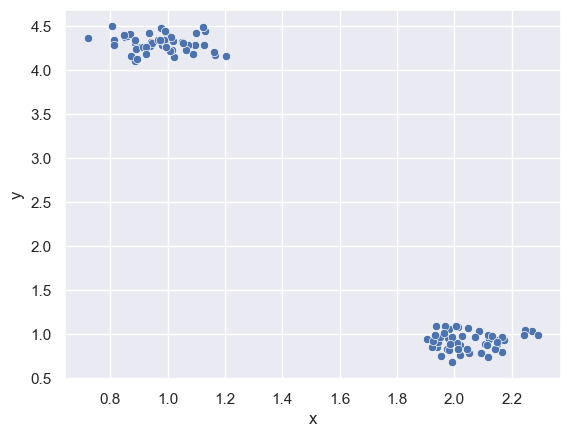

In [6]:
var = 0.01  # low variance

# generate low variance/high density clusters
data = gen_data(samples=100, clusters=2, density=math.sqrt(var))
sns.scatterplot(x=data['x'], y=data['y'])


### Example of High Variance Clusters

<Axes: xlabel='x', ylabel='y'>

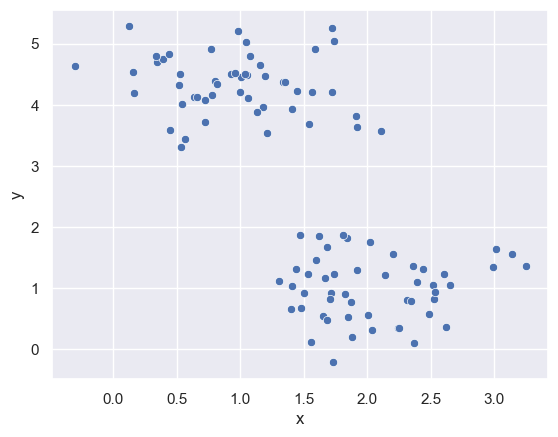

In [7]:
var = 0.25  # high variance

# generate high variance/low density clusters
data = gen_data(samples=100, clusters=2, density=math.sqrt(var))
sns.scatterplot(x=data['x'], y=data['y'])


# The k-Means Algorithm


* Perhaps the most wellknown clustering algorithm is the k-means algorithm.
* The k-means algorithm,
   * The algorithm searches for a pre-determined number (**k**) of clusters.
   * A cluster center is the **mean** of all the points belonging to that cluster.
   * Each point belongs to exactly one cluster.


[More information](https://en.wikipedia.org/wiki/K-means_clustering)

## The Mathematics of k-Means

Our training data consists of $n$ data points,
$$
\{\bar{x}_1, \bar{x}_2,\ldots,\bar{x}_n\}
$$
We have $k$ clusters and the clusters partition our data into a set of partitions $C^k$ with one partition for each cluster,
$$
C^k = \{C_1, C_2,\ldots,C_k\}
$$
Now we can formulate the k-means algorithm as an **optimization problem**,
$$
\min_{C^k} \sum_{i=1}^k \frac{1}{|C_i|}\sum_{\bar{x}\in C_i} {\rm dist}(\bar{x},\bar{\mu}_i)^2 
   = \min_{C^k} \sum_{i=1}^k {\rm Var}(C_i)
   = \min_{C^k} {\rm Var}(C^k)
$$
where $\bar{\mu}_i$ is the mean and $|C_i|$ is size of cluster $C_i$.

**To paraphrase this definition**: 
*Compute a cluster structure $C^k$ in such a way that the variance in the cluster structure is minimized, that is,
the tightest clusters are computed.*

**Observation**: Optimization almost always means **searching** and that is what we will see in the k-means algorithm as well.

## Visualizing k-Means

Let's build up some intuition by visualizing the k-means model:
* Given a data set with an unknown cluster structure 
* K-means will try to find this structure by moving its k points so they become the cluster centers minimizing the variance across the clusters.
* Here we visualize the k-means model on a synthetic 2D dataset

In [8]:
X = gen_data()
X.head(n=10)

,x,y
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542
5,3.437618,0.261654
6,-1.808223,1.597017
7,1.413724,4.381177
8,-0.204932,8.432097
9,-0.711100,8.660438


<Axes: xlabel='x', ylabel='y'>

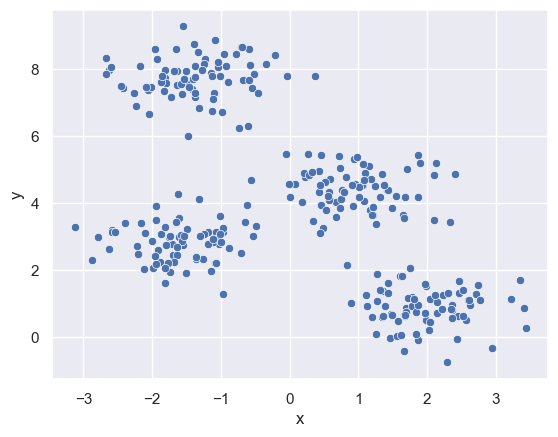

In [9]:
# plot the data 
sns.scatterplot(x=X['x'], y=X['y'])

We can clearly see 4 clusters (usually this is not known!)

Now let's build a cluster model on this data.

In [10]:
# build a k-means model with k=4
model = cluster\
   .KMeans(4) \
   .fit(X)      # NOTE: no target variable needed for unsupervised learning

In [11]:

# grab the cluster centers from the model
centers = pandas.DataFrame(model.cluster_centers_, columns=['x','y'])
centers

,x,y
0,-1.373244,7.753689
1,1.982583,0.867713
2,-1.584385,2.830813
3,0.949735,4.419069


We see the four centroids of the cluster model as expected.

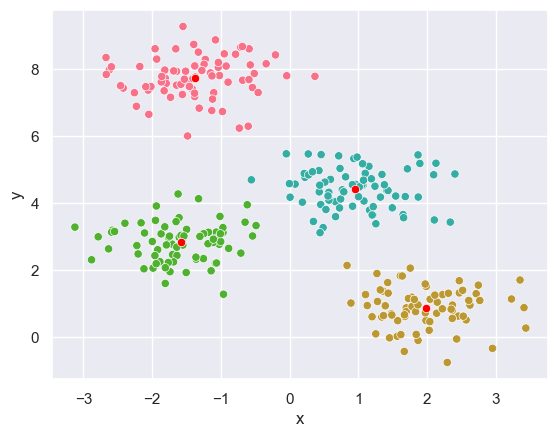

In [12]:
# plot color coded clusters
# cluster centers are shown in red
plot_clusters(model, X)

**Observations**:
* K-means found the centers of the clusters
* Cluster structures reduce the variance in a data set,
   * ${\rm Var}(C) < {\rm Var}(X)$
   * that is, the variance in the cluster structure is less than the variance in the total data set

## A More Detailed Look at k-Means

>* The k-means algorithm is an optimization algorithm, that means it is a **search**
>* The search is straight forward and consists of the following steps:
>    * Guess k cluster centers
>    * Repeat until no further changes detected:
>        1. assign points to their nearest cluster center
>        1. set the cluster centers to the mean of the points currently assigned to each of them

Here is a visualization of the process,

![kmeans-steps](https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/kmeans.gif)




**Observations**:
* At iteration 0 it simply guesses some centers
* Then keeps refining them until no more changes are observed.

## The k in k-Means

* One of the big drawbacks of the k-means algorithm is the necessity to figure out the correct number of clusters to find in the data. 
* If we pick k **too large** it will **invent clusters** that are not there.
* If we pick k **too small** it will **not find all clusters**.

Consider the consequences of an incorrect value for k.  

First we consider picking a **k too large**.

In [13]:
k = 6

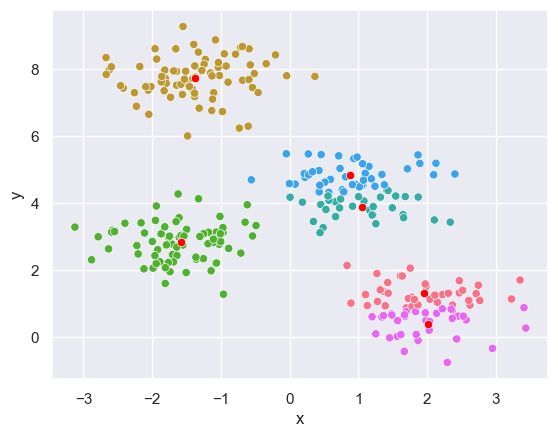

In [14]:
plot_clusters(cluster.KMeans(k).fit(X), X)


**Observation**: 
* k-means has to assign the centroids to something
* It starts to break down existing clusters into non-existing smaller clusters.

Next we consider the case where **we select k too small**.  

In [15]:
k = 2

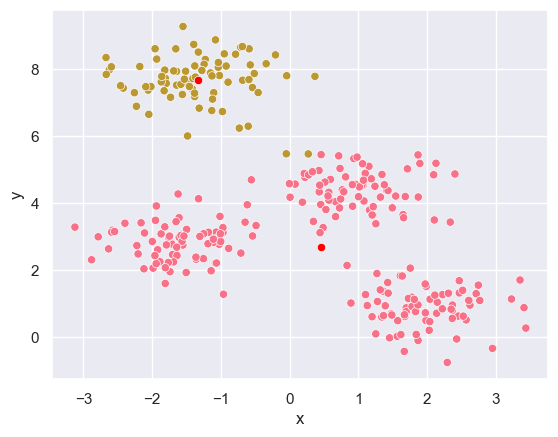

In [16]:
plot_clusters(cluster.KMeans(k).fit(X), X)


**Observation**: 
* k-means does not have enough centroids to model all the clusters
* Assigns a single centroid to multiple clusters.

## The Elbow Method

* The **elbow method** lets us determine the **optimal value for k**.
* Steps of the elbow method:  
   * The elbow method computes a series of cluster models
   * For each of the models it computes the sum of the variances within the clusters.  
   * It plots these sums of variances
   * The characteristic crick/elbow in the curve is where the variances within the clusters changes drastically.  
* Picking a value for k larger than the value at the crick will likely lead to "phantom" clusters as we saw above when we picked k too large,
   * coherent clusters are split due to the fact that k-means has to find exactly k clusters.
* Picking a value for k smaller than the value at the crick will lead to "merged" clusters as we saw above 
   when we picked k too small,
   * existing clusters in the data are merged because there are not enough centroids


### The Elbow Plot

* This following code demonstrates this.  
* As long as we pick the k from the elbow of the curve we obtain good cluster models.

<Axes: xlabel='x', ylabel='y'>

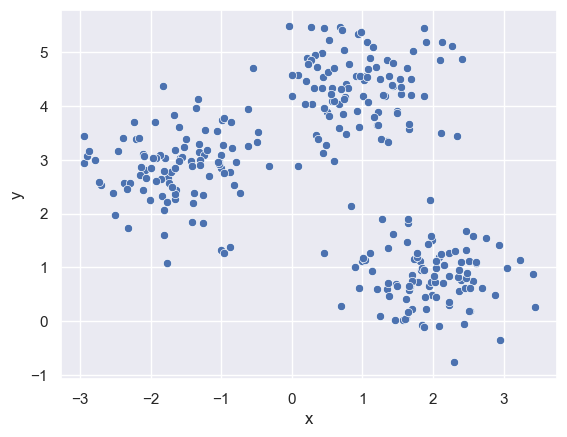

In [17]:
# pick number of clusters to generate
k = 3

# generate the data
X = gen_data(samples=k*100, clusters=k)
# plot clusters
sns.scatterplot(x=X['x'], y=X['y'])

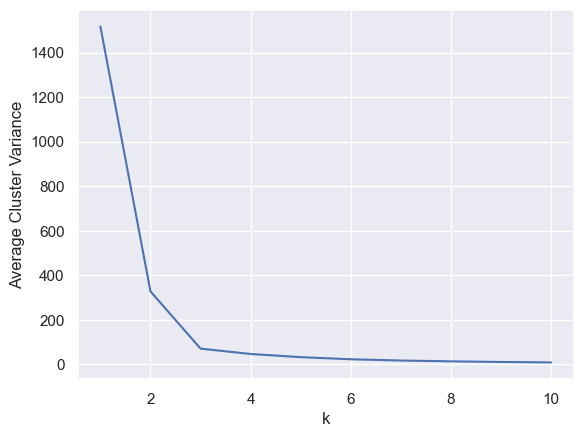

In [18]:

# generate elbow plot
dsutils.plot_elbow(X)

In [19]:
# read a value for k from the graph
k_pick = 3

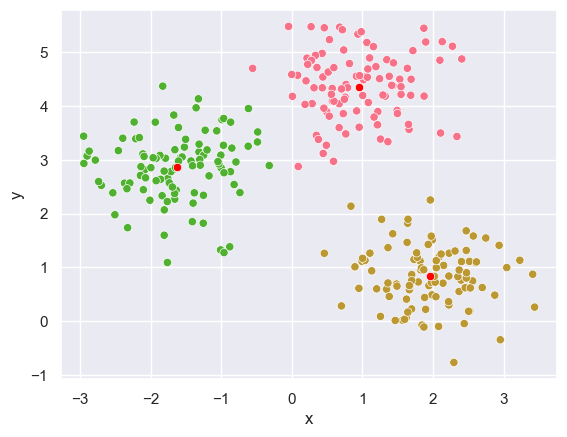

In [20]:

# build model for the given k
model = cluster.KMeans(k_pick).fit(X)
plot_clusters(model, X)

**Demo**: Pick different values for k and observe the effect on the cluster model.

# Why Clustering is Interesting

Sure, k-means can discover clusters in data but why is that interesting?  It is interesting because,

> The centroids of the clusters tell us the **average** properties of the points that belong to the individual clusters.

Consider our iris dataset.  We know from our previous work with this dataset that there are three clusters, one for each type of Iris flower.



In [21]:
# get data
df = pandas.read_csv(home+"iris.csv")
df.head()

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [22]:
# Build a 2D training data using only the Petal features
X = df[['Petal.Length','Petal.Width']]
# y is not used for unsupervised learning but we need it for plotting
y = df['Species'] 

In [23]:
X

,Petal.Length,Petal.Width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


<Axes: xlabel='Petal.Length', ylabel='Petal.Width'>

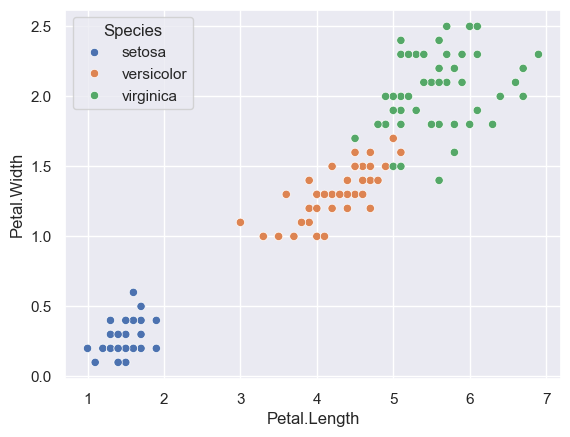

In [24]:
# visualize our 2-D view of the dataset just to get a feel for the clusters
sns.scatterplot(data=X, x='Petal.Length', y='Petal.Width', hue=y)

**Question**: Can we recover those three clusters using k-means?

**First step**, use the **elbow method** to estimate a value for k.

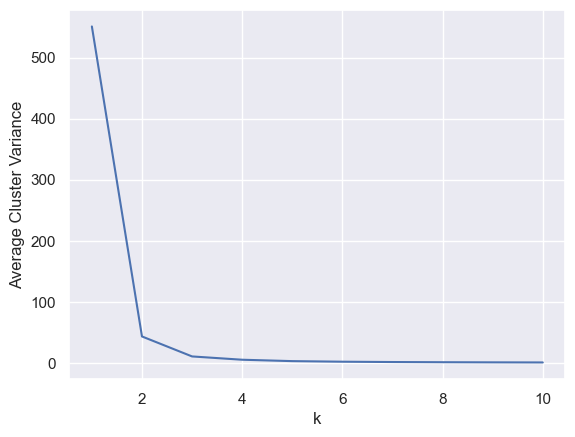

In [25]:
dsutils.plot_elbow(X)

Sure enough, the elbow is right at k=3 or k=4.

**Next step**. Build a k-means model with k=3.  We plot the model on top of the dataset.  

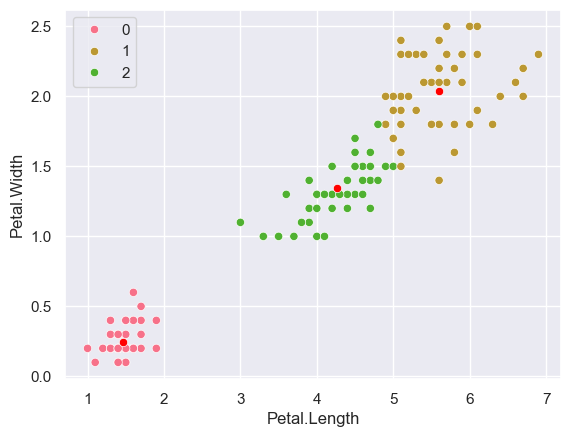

In [26]:
# fit model
k = 3 # from elbow plot
model = cluster.KMeans(k).fit(X)

plot_clusters(model, X, legend=True)

As expected, the centers of the clusters wind up right in the middle of the data clusters.  


**Final step**. We can now retrieve the cluster centers and see the average properties of the points within each cluster.

In [27]:
centers = pandas.DataFrame(model.cluster_centers_, columns=X.columns)
centers

,Petal.Length,Petal.Width
0,1.462000,0.246000
1,5.595833,2.037500
2,4.269231,1.342308


We can relate the k-means labels back to the flower labels by checking where the centroid falls in our graph:

* Label 0 describes versicolor
* Label 1 describes virginica
* Label 2 describes setosa

We can incorporate this information into our centroids dataframe.

In [28]:
centers.index = ['versicolor','virginica','setosa']
centers

,Petal.Length,Petal.Width
versicolor,1.462000,0.246000
virginica,5.595833,2.037500
setosa,4.269231,1.342308


**Observation**: The centroids now tell us the average properties of each flower.  
